In [1]:
!pwd

/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml


In [6]:
import os

file_path = '/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/car-in-the-dat.zip'
print(os.path.exists(file_path))  # Should return True


False


In [24]:
# import zipfile
# import pandas as pd

    # df=pd.read_csv('/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/data/train.csv')

# or-------

# # Path to the ZIP folder
# zip_path = '/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/cat-in-the-dat.zip'

# # Open the zip and list contents
# with zipfile.ZipFile(zip_path, 'r') as z:
#     print("Files in ZIP:", z.namelist())  # View files like 'train.csv', 'test.csv'

#     # Load specific CSVs
#     with z.open('train.csv') as f:
#         train_df = pd.read_csv(f)

#     with z.open('test.csv') as f:
#         test_df = pd.read_csv(f)

# # Now you can use train_df and test_df as usual
# # print(train_df.head())
# # print(test_df.head())


## Start

In [17]:
mapping={
    "Freezing": 0,
    "Warm": 1,
    "Cold": 2,
    "Boiling Hot": 3,
    "Hot": 4,
    "Lava Hot": 5
    
}

In [18]:
train_df.ord_2.value_counts()

ord_2
Freezing       99816
Lava Hot       63908
Boiling Hot    60627
Cold           33768
Hot            22227
Warm           19654
Name: count, dtype: int64

In [19]:
train_df.loc[:,"ord_2"]=train_df.ord_2.map(mapping)

In [20]:
train_df.ord_2.value_counts()

ord_2
0    99816
5    63908
3    60627
2    33768
4    22227
1    19654
Name: count, dtype: int64

## ~ LabelEncoder,OneHotEncoder,Binarization
- above same encoding into numerical value can be done by LabelEncoder from scikit-learn

### Label Encoder

In [22]:
from sklearn import preprocessing
df=pd.read_csv('/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/data/train.csv')

In [25]:
df.loc[:,"ord_2"]=df.ord_2.fillna("NONE")
# LabelEncoder from scikit-learn does not handle NaN values, 

In [26]:
lbl_enc=preprocessing.LabelEncoder()

In [27]:
# fit label encoder and transform values on ord_2 column
# P.S: do not use this directly. fit first, then transform
df.loc[:,"ord_2"]=lbl_enc.fit_transform(df.ord_2.values)

-  checking the bytes used by different techniques

In [29]:
import numpy as np
example=np.array([
    [0,0,1],
    [1,0,0],
    [1,0,1]]
)
print(example.nbytes)

72


In [30]:
from scipy import sparse

example=np.array(
    [[0, 0, 1],
[1, 0, 0],
[1, 0, 1]]
)

sparse_example=sparse.csr_matrix(example)
print(sparse_example.data.nbytes)

32


- The total size of the sparse csr matrix is the sum of three values.

In [32]:
print(
    sparse_example.data.nbytes +
sparse_example.indptr.nbytes +
sparse_example.indices.nbytes
)

64


In [33]:
# number of rows
n_rows = 10000
# number of columns
n_cols = 100000
# create random binary matrix with only 5% values as 1s
example = np.random.binomial(1, p=0.05, size=(n_rows, n_cols))
# print size in bytes
print(f"Size of dense array: {example.nbytes}")
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")
full_size = (
sparse_example.data.nbytes +
sparse_example.indptr.nbytes +
sparse_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 8000000000
Size of sparse array: 399997896
Full size of sparse array: 600036848


In [35]:
# So, dense array takes ~8000MB or approximately 8GB of memory. The sparse
# array, on the other hand, takes only 399MB of memory.
# And, that’s why we prefer sparse arrays over dense whenever we have a lot of zeros
# in our features.

### Binarization

In [36]:
import numpy as np
from scipy import sparse
# create binary matrix
example = np.array(
[
[0, 0, 0, 0, 1, 0],
[0, 1, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0]
]
)
# print size in bytes
print(f"Size of dense array: {example.nbytes}")
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")
full_size = (
sparse_example.data.nbytes +
sparse_example.indptr.nbytes +
sparse_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 144
Size of sparse array: 24
Full size of sparse array: 52


### OneHotEncoding

In [39]:
import numpy as np
from sklearn import preprocessing
# create random 1-d array with 1001 different categories (int)
example = np.random.randint(1000, size=1000000)
# initialize OneHotEncoder from scikit-learn
# keep sparse = False to get dense array
ohe = preprocessing.OneHotEncoder(sparse_output=False)
# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")
# initialize OneHotEncoder from scikit-learn
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse_output=True)
# fit and transform data with sparse one-hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size of this sparse matrix
print(f"Size of sparse array: {ohe_example.data.nbytes}")
full_size = (
ohe_example.data.nbytes +
ohe_example.indptr.nbytes + ohe_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 8000000000
Size of sparse array: 8000000
Full size of sparse array: 16000004


### Data manipulation

In [40]:
df.groupby(["ord_2"])["id"].transform("count")


0         33768
1         22227
2         63908
3         60627
4         99816
          ...  
299995    99816
299996    99816
299997    60627
299998    60627
299999    99816
Name: id, Length: 300000, dtype: int64

In [41]:
df.groupby(['ord_1','ord_2'])['id'].count().reset_index(name='count')

,ord_1,ord_2,count
0,Contributor,0,8692
1,Contributor,1,4842
2,Contributor,2,14284
3,Contributor,3,3122
4,Contributor,4,9074
5,Contributor,5,2857
6,Expert,0,4980
7,Expert,1,2850
8,Expert,2,8432
9,Expert,3,1887


- is used to count the number of rows (based on id) for each combination of ord_1 and ord_2 values in your DataFrame.
- .reset_index(name="count")
Resets the index (so you get a flat DataFrame) and renames the id count column to "count".

In [43]:
# create new feature
df['new feature']=df.ord_1.astype(str)+"_"+df.ord_2.astype(str)
df['new feature'].head(5)

0    Grandmaster_1
1    Grandmaster_3
2         Expert_4
3    Grandmaster_0
4    Grandmaster_2
Name: new feature, dtype: object

#### Steps
Whenever you get categorical variables, follow these simple steps:
- • fill the NaN values (this is very important!)
- • convert them to integers by applying label encoding using LabelEncoder of scikit-learn or by using a mapping dictionary. If you didn’t fill up NaN
values with something, you might have to take care of them in this step
- • create one-hot encoding. Yes, you can skip binarization!


#### "rare" Category
- A rare category is a category
which is not seen very often and can include many different categories. You can
also try to “predict” the unknown category by using a nearest neighbour model
- if you predict this category, it will become one of the categories from
the training data.
- we can build a simple model
that’s trained on all features except “f3”(feature column where rare value is there). Thus, you will be creating a model that
predicts “f3” when it’s not known or not available in training.

🧠 If you design your cross-validation in such a way that it
replicates the prediction process when you run your model on test data, then it’s
never going to overfit.

for e.g 💡 Suppose you want to concatenate training and test data, then in each
fold you must concatenate training and validation data and also make sure that your
validation dataset replicates the test set. 

In [48]:
import pandas as pd
from sklearn import preprocessing
# read training data
train =pd.read_csv('/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/data/train.csv')
#read test data
test =pd.read_csv('/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/data/test.csv')
# create a fake target column for test data
# since this column doesn't exist
test.loc[:, "target"] = -1
# concatenate both training and test data
data = pd.concat([train, test]).reset_index(drop=True)
# make a list of features we are interested in
# id and target is something we should not encode
features = [x for x in train.columns if x not in ["id", "target"]]
# loop over the features list
for feat in features:
    # create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()
    # note the trick here
    # since its categorical data, we fillna with a string
    # and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical!!!
    temp_col = data[feat].fillna("NONE").astype(str).values
    # we can use fit_transform here as we do not
    # have any extra test data that we need to
    # transform on separately
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)
    # split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

In [55]:
# df =pd.read_csv('/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/data/train.csv')

df.ord_2.fillna("NONE").value_counts()

ord_2
Freezing       99816
Lava Hot       63908
Boiling Hot    60627
Cold           33768
Hot            22227
Warm           19654
Name: count, dtype: int64

- 🧠💡 We can treat “NONE” as unknown. So, if during live testing, we get new categories
that we have not seen before, we will mark them as “NONE”.

In [58]:
len(df)

300000

In [60]:
df.ord_4.fillna("NONE").value_counts()

ord_4
L    19066
G    18899
S    18875
A    18258
R    16927
Q    15925
K    14698
I    14644
Z    14232
T    14220
V    14143
J    12878
P    12839
U    12775
H    12743
F    11717
E    11303
W     9197
Y     8490
X     6292
B     6169
O     5836
D     3974
C     3575
N     2166
M      159
Name: count, dtype: int64

- We see that some values appear only a couple thousand times, and some appear
almost 40000 times.
- define our criteria for calling a value “rare”. Let’s say the requirement
for a value being rare in this column is a count of less than 3000
- and all missing values will be mapped to
“NONE”.(in data set not preset but in other case)

In [68]:
df.loc[df.ord_4.value_counts()[df.ord_4].values<3000,'ord_4']="RARE"

In [69]:
df.ord_4.value_counts()

ord_4
L       19066
G       18899
S       18875
A       18258
R       16927
Q       15925
K       14698
I       14644
Z       14232
T       14220
V       14143
J       12878
P       12839
U       12775
H       12743
F       11717
E       11303
W        9197
Y        8490
X        6292
B        6169
O        5836
D        3974
C        3575
RARE     2325
Name: count, dtype: int64

### Building our model

Before going to any kind of model building, it’s essential to take care of cross-
validation. We have already seen the label/target distribution, and we know that it
is a binary classification problem with skewed targets. Thus, we will be using
StratifiedKFold to split the data here

#### Creat_folds for cat-in-data

## Model-1 Logistic Regression + one Hot Encoding

/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/src/ohe_logres.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '1' '2' ... '299997' '299998' '299999']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/src/ohe_logres.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/src/ohe_logres.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/src/ohe_logres.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '1' ... '0' '0' '0']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/src/ohe_logres.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '3' ... '1' '1' '3']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/src/ohe_logres.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['3' '1' '4' ... '1' '2' '5']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/src/ohe_logres.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['3' '3' '4' ... '2' '3' '5']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/Users/akhichoudhary/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
-- $$ 0.7916089250181116 $$

In [73]:
!pwd

/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml


In [80]:
# # python -W ignore src/ohe_logres.py
# Fold = 0, AUC = 0.7916089250181116
# Fold = 1, AUC = 0.7885835002477297
# Fold = 2, AUC = 0.7908998540691035
# Fold = 3, AUC = 0.7898881988857341
# Fold = 4, AUC = 0.7915466071107451

## Model -2 RandomForest + labelEncoder()

#### n_jobs=-1 →
- Tells scikit-learn how many CPU cores to use in parallel when building the forest.
#### n_jobs can be:
- 1 → Use only one core (no parallelism).
- -1 → Use all available cores on your machine.
- Any positive integer → Use that many cores (e.g., n_jobs=4 uses 4 cores).
#### Why use [:, 1]?
- In binary classification, column index 0 is P(class=0) and column index 1 is P(class=1).
  | Method            | Output                        | Use case                                                                      |
| ----------------- | ----------------------------- | ----------------------------------------------------------------------------- |
| `predict()`       | Class labels (0/1)            | When you just want the predicted category                                     |
| `predict_proba()` | Probabilities for all classes | When you need probability scores for metrics like ROC AUC, log loss, PR curve |

#### 1. model.predict(x_valid)
- Returns: The predicted class label for each row (e.g., 0 or 1 in binary classification).

- Uses the probabilities internally, but applies a decision threshold (default = 0.5).

- Probs: [[0.80, 0.20],
        [0.35, 0.65],
        [0.10, 0.90]]

- model.predict(...) → [0, 1, 1]



#### 2. model.predict_proba(x_valid)
- Returns: The probability distribution over all classes for each row.

- Shape: (n_samples, n_classes).

- model.predict_proba(...) →
[[0.80, 0.20],
 [0.35, 0.65],
 [0.10, 0.90]]

- [[0.80, 0.20],   # Sample 1 → 80% class 0, 20% class 1
-  [0.35, 0.65],   # Sample 2 → 35% class 0, 65% class 1
-  [0.10, 0.90]]   # Sample 3 → 10% class 0, 90% class 1

- valid_preds = probability of target = 1 for each validation sample.

### df_valid.target.values → Actual labels (0 or 1).

valid_preds → Probability that each sample is class 1 (positive class).

So if valid_preds[i] = 0.87, that means:

“The model thinks there’s an 87% chance this sample is class 1.”

How AUC uses this
ROC AUC does not fix a single threshold (like 0.5).

Instead, it:

Sorts samples by predicted probability.

Sweeps through all possible thresholds (0 → 1).

Calculates True Positive Rate vs False Positive Rate for each threshold.

The area under that curve = how well the model ranks positives above negatives.

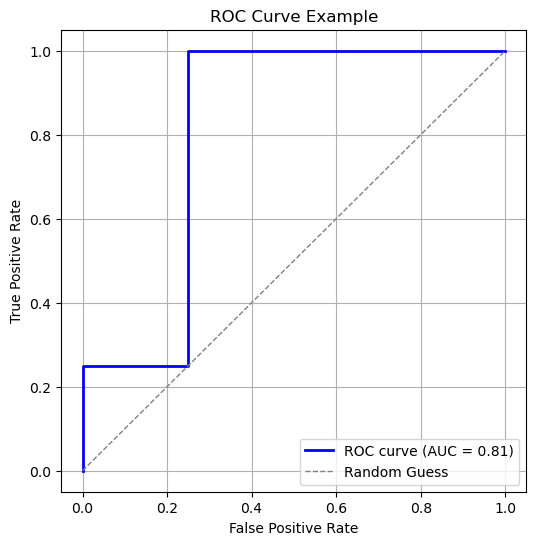

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example true labels and predicted probabilities
y_true = [1, 0, 1, 0, 1, 0, 1, 0]
y_scores = [0.95, 0.85, 0.70, 0.10, 0.80, 0.40, 0.65, 0.20]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Model-3 Random Forest + One Hot encoding+Simple value decomposition(SVD)

## Model-4 XGBoost+LabelEncoder

## Adult data frame 
#### - ohe_logres.py
#### - lbl_xgb.py
#### - lbl_xgb_num.py
#### - lbl_xgb_num_feat.py
#### - target_encoding.py
#### - entity_embeddings.py - for cat-in-data set

In [84]:
# pd.read_csv('https://archive.ics.uci.edu/ml/datasets/adult.csv')
import pandas as pd

column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

df = pd.read_csv(
    url,
    header=None,
    names=column_names,
    sep=',\s*',
    engine='python'
)

print("Loaded rows:", df.shape[0])
df.info()


Loaded rows: 32561
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [86]:
df.income.value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [87]:
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### 1 ohe_logres.py

In [102]:

import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

def run(fold):
    # load the full training data with folds
    df = pd.read_csv("/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/input/adult_folds.csv")
    # list of numerical columns
        # list of numerical columns
    num_cols = [
    "fnlwgt",
    "age",
    "capital_gain",
    "capital_loss",
    "hours_per_week"
    ]
    # drop numerical columns
    df = df.drop(num_cols, axis=1)
    features = [c for c in df.columns if c not in ("kfold", "income")]

    # clean income column first
    df["income"] = df["income"].str.strip()
    
    # map targets
    target_mapping = {"<=50K": 0, ">50K": 1}
    df["income"] = df["income"].map(target_mapping)
    
    # get training and validation
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    # OneHotEncoder
    ohe = preprocessing.OneHotEncoder(handle_unknown="ignore")
    
    # fit only on training
    ohe.fit(df_train[features])
    
    # transform
    x_train = ohe.transform(df_train[features])
    x_valid = ohe.transform(df_valid[features])
    
    # model
    model = linear_model.LogisticRegression(max_iter=1000, solver="liblinear")
    model.fit(x_train, df_train.income.values)
    
    # predict
    valid_preds = model.predict_proba(x_valid)[:, 1]
    auc = metrics.roc_auc_score(df_valid.income.values, valid_preds)
    print(f"Fold={fold}, AUC={auc:.4f}")

if __name__ == "__main__":
    for fold_ in range(5):
        run(fold_)
    

Fold=0, AUC=0.8752
Fold=1, AUC=0.8823
Fold=2, AUC=0.8766
Fold=3, AUC=0.8784
Fold=4, AUC=0.8804


In [92]:
df.income

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, Length: 32561, dtype: object

In [94]:
target_mapping = {
    "<=50K": 0,
    ">50K": 1
    }
df.loc[:, "income"] = df.income.map(target_mapping)
    

In [95]:
df.income

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: object

In [101]:
!pwd

/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml


python(64468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


### 2.lbl_xgb.py 

In [120]:
# lbl_xgb_num.py
# Now, let’s try to include numerical features in the xgboost model without parameter tuning.
# =================== adult dataset=============================================
import pandas as pd
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
def run(fold):
    # load the full training data with folds
    df = pd.read_csv("/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/input/adult_folds.csv")
    # list of numerical columns
    num_cols = [
    "fnlwgt",
    "age",
    "capital_gain",
    "capital_loss",
    "hours_per_week"
    ]
    # drop numerical columns
    df = df.drop(num_cols, axis=1)
    # map targets to 0s and 1s
    target_mapping = {
    "<=50K": 0,
    ">50K": 1
    }
    df.loc[:, "income"] = df.income.str.strip().map(target_mapping)
    # all columns are features except kfold & income columns
    features = [
    f for f in df.columns if f not in ("kfold", "income")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # now its time to label encode the features
    for col in features:
        # initialize LabelEncoder for each feature column
        lbl = preprocessing.LabelEncoder()
        # fit label encoder on all data
        lbl.fit(df[col])
        # transform all the data
        df.loc[:, col] = lbl.transform(df[col])
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values
    # initialize xgboost model
    model = xgb.XGBClassifier(
    n_jobs=-1
    )
    # fit model on training data (ohe)
    model.fit(x_train, df_train.income.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.income.astype(int).values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")
if __name__ == "__main__":
    for fold_ in range(5):
        run(fold_)

/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/2921746505.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


Fold = 0, AUC = 0.8690944699177635


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/2921746505.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


Fold = 1, AUC = 0.8800220634370253


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/2921746505.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


Fold = 2, AUC = 0.8733100263770557


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/2921746505.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


Fold = 3, AUC = 0.873416512387722
Fold = 4, AUC = 0.8768071017848887


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/2921746505.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


### 3 lbl_xgb_num.py

In [106]:
import pandas as pd
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
def run(fold):
    # load the full training data with folds
    df = pd.read_csv("/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/input/adult_folds.csv")
    # list of numerical columns
    num_cols = [
    "fnlwgt",
    "age",
    "capital_gain",
    "capital_loss",
    "hours_per_week"
    ]
    # map targets to 0s and 1s
    target_mapping = {
    "<=50K": 0,
    ">50K": 1
    }
    df.loc[:, "income"] = df.income.map(target_mapping)
    # all columns are features except kfold & income columns
    features = [
    f for f in df.columns if f not in ("kfold", "income")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
    # do not encode the numerical columns
        if col not in num_cols:
            df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # now its time to label encode the features
    for col in features:
        if col not in num_cols:
    # initialize LabelEncoder for each feature column
            lbl = preprocessing.LabelEncoder()
    # fit label encoder on all data
            lbl.fit(df[col])
    # transform all the data
            df.loc[:, col] = lbl.transform(df[col])
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values
    # initialize xgboost model
    model = xgb.XGBClassifier(
    n_jobs=-1
    )
    # fit model on training data (ohe)
    model.fit(x_train, df_train.income.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.income.astype(int).values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")
if __name__ == "__main__":
    for fold_ in range(5):
        run(fold_)  

/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/2413094749.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


Fold = 0, AUC = 0.9205525080390493


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/2413094749.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


Fold = 1, AUC = 0.9303020358628887


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/2413094749.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


Fold = 2, AUC = 0.9257031430594083


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/2413094749.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


Fold = 3, AUC = 0.927766430449607
Fold = 4, AUC = 0.9238521182137905


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/2413094749.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


In [111]:
df = pd.read_csv("/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/input/adult_folds.csv")
    # list of numerical columns
num_cols = [
    "fnlwgt",
    "age",
    "capital_gain",
    "capital_loss",
    "hours_per_week"
    ]
    # map targets to 0s and 1s
target_mapping = {
    "<=50K": 0,
    ">50K": 1
    }
df.loc[:, "income"] = df.income.map(target_mapping)
    # all columns are features except kfold & income columns
features = [
    f for f in df.columns if f not in ("kfold", "income")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
for col in features:
    # do not encode the numerical columns
    if col not in num_cols:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # now its time to label encode the features
for col in features:
    if col not in num_cols:
    # initialize LabelEncoder for each feature column
        lbl = preprocessing.LabelEncoder()
    # fit label encoder on all data
        lbl.fit(df[col])
    # transform all the data
        df.loc[:, col] = lbl.transform(df[col])
    # get training data using folds
df_train = df[df.kfold != 0].reset_index(drop=True)
    # get validation data using folds
df_valid = df[df.kfold == 0].reset_index(drop=True)
    # get training data
x_train = df_train[features].values
    # get validation data
x_valid = df_valid[features].values
    # initialize xgboost model
model = xgb.XGBClassifier(
    n_jobs=-1
    )
    # fit model on training data (ohe)
model.fit(x_train, df_train.income.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
auc = metrics.roc_auc_score(df_valid.income.astype(int).values, valid_preds)
    

/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/63061025.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


In [113]:
df_train.kfold.unique()

array([1, 2, 3, 4])

In [117]:
x_train[1]

array([20, 4, 366929, 15, 1, 4, 1, 3, 4, 0, 0, 0, 35, 39], dtype=object)

In [118]:
valid_preds

array([9.1151660e-04, 1.1261039e-02, 5.8521949e-02, ..., 9.9759799e-01,
       4.9624354e-01, 1.3435982e-01], dtype=float32)

### 4 lbl_xgb_num_feat.py

In [122]:
import itertools
list(itertools.combinations([1,2,3,4,5], 4))

[(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 4, 5), (1, 3, 4, 5), (2, 3, 4, 5)]

In [125]:
import itertools
import pandas as pd
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
def feature_engineering(df, cat_cols):
    """
    This function is used for feature engineering
    :param df: the pandas dataframe with train/test data
    :param cat_cols: list of categorical columns
    :return: dataframe with new features
    """
    # this will create all 2-combinations of values
    # in this list
    # for example:
    # list(itertools.combinations([1,2,3], 2)) will return
    # [(1, 2), (1, 3), (2, 3)]
    combi = list(itertools.combinations(cat_cols, 2))
    for c1, c2 in combi:
        df.loc[:,c1 + "_" + c2] = df[c1].astype(str) + "_" + df[c2].astype(str)
    return df
    
def run(fold):
    # load the full training data with folds
    df = pd.read_csv("/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/input/adult_folds.csv")
    # list of numerical columns
    num_cols = [
    "fnlwgt",
    "age",
    "capital.gain",
    "capital.loss",
    "hours.per.week"
    ]
    # map targets to 0s and 1s
    target_mapping = {
    "<=50K": 0,
    ">50K": 1
    }
    df.loc[:, "income"] = df.income.map(target_mapping)
    # list of categorical columns for feature engineering
    cat_cols = [
    c for c in df.columns if c not in num_cols
    and c not in ("kfold", "income")
    ]
    # add new features
    df = feature_engineering(df, cat_cols)
    # all columns are features except kfold & income columns
    features = [
    f for f in df.columns if f not in ("kfold", "income")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
    # do not encode the numerical columns
        if col not in num_cols:
            df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # now its time to label encode the features
    for col in features:
        if col not in num_cols:
    # initialize LabelEncoder for each feature column
            lbl = preprocessing.LabelEncoder()
    # fit label encoder on all data
            lbl.fit(df[col])
    # transform all the data
            df.loc[:, col] = lbl.transform(df[col])
    # get training data using folds
            df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values
    # initialize xgboost model
    model = xgb.XGBClassifier(
    n_jobs=-1
    )
    # fit model on training data (ohe)
    model.fit(x_train, df_train.income.astype(int).values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.income.astype(int).values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")
if __name__ == "__main__":
    for fold_ in range(5):
        run(fold_)

/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '6514']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatib

Fold = 0, AUC = 0.9175999363682679


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '6514']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatib

Fold = 1, AUC = 0.9284099903614358


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '6514']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatib

Fold = 2, AUC = 0.9231155523495806


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '6514']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatib

Fold = 3, AUC = 0.9250529398652665


/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '6514']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")
/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/3234523907.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatib

Fold = 4, AUC = 0.922317068514299


### 4. target_encoding

In [151]:
encoded_dfs=[]
for column in features:
    # create dict of category:mean target
        mapping_dict = dict(df_train.groupby(column)["income"].mean())
    # column_enc is the new column we have with mean encoding
        df_valid.loc[:, column + "_enc"] = df_valid[column].map(mapping_dict)
    # append to our list of encoded validation dataframes
        encoded_dfs.append(df_valid)
    # create full data frame again and return
encoded_df = pd.concat(encoded_dfs, axis=0)

In [152]:
features = [f for f in df.columns if f not in ("kfold", "income") and f not in num_cols]
features


['workclass',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [136]:
dict(df_train.groupby('education')["income"].mean())

{0: 0.07181571815718157,
 1: 0.052854122621564484,
 2: 0.07602339181286549,
 3: 0.036231884057971016,
 4: 0.04428044280442804,
 5: 0.06679764243614932,
 6: 0.05555555555555555,
 7: 0.23372093023255813,
 8: 0.2621184919210054,
 9: 0.41343910405972933,
 10: 0.7307692307692307,
 11: 0.15975975975975976,
 12: 0.5555555555555556,
 13: 0.0,
 14: 0.740343347639485,
 15: 0.19033078880407125}

In [139]:
sorted(df_train['education'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [145]:
dict(df_train.groupby('relationship')["income"].mean())

{0: 0.4516251302947029,
 1: 0.10097524381095274,
 2: 0.03841229193341869,
 3: 0.012051155927201181,
 4: 0.06165632980663991,
 5: 0.47101449275362317}

In [142]:
df_train['relationship'].unique()

array([1, 3, 4, 5, 0, 2], dtype=object)

In [146]:
df_valid['relationship'].map(mapping_dict)

0       0.400000
1       0.288136
2       0.400000
3       0.400000
4       0.243644
          ...   
6508    0.243644
6509    0.243644
6510    0.306667
6511    0.306667
6512    0.400000
Name: relationship, Length: 6513, dtype: float64

In [154]:
encoded_df[['relationship','relationship_enc']]

,relationship,relationship_enc
0,1,0.100975
1,3,0.012051
2,1,0.100975
3,1,0.100975
4,0,0.451625
...,...,...
6508,0,0.451625
6509,0,0.451625
6510,5,0.471014
6511,5,0.471014


In [175]:
# target_encoding.py
# One more way of feature engineering from categorical features is to use target encoding.
# you must be very careful
# when using target encoding as it is too prone to overfitting. When we use target
# encoding, it’s better to use some kind of smoothing or adding noise in the encoded
# values. Scikit-learn has contrib repository which has target encoding with
# smoothing, or you can create your own smoothing. Smoothing introduces some
# kind of regularization that helps with not overfitting the model.

# ========    used mean. You can use mean, median, standard deviation or any other function of targets. ==========*******
# what's going on 💡
# - The dataset of 100 rows is split into 5 folds → each fold has 80 train + 20 valid rows.
# - For each fold, we compute the mean of Income grouped by categorical column on the train set.
# - This encoding is then mapped onto the 20 validation rows and stored in an encoded dataset.
# - After all 5 folds, the encoded dataset has 100 rows (all validation parts combined), ready for the run function. ✅

# target_encoding.py
import copy
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
import xgboost as xgb

def mean_target_encoding(data):
    # make a copy of dataframe
    df = copy.deepcopy(data)
    # list of numerical columns
    num_cols = [
    "fnlwgt",
    "age",
    "capital_gain",
    "capital_loss",
    "hours_per_week"
    ]
    # map targets to 0s and 1s
    target_mapping = {
    "<=50K": 0,
    ">50K": 1
    }
    df.loc[:, "income"] = df.income.map(target_mapping)
    # all columns are features except income and kfold columns
    features = [f for f in df.columns if f not in ("kfold", "income") and f not in num_cols]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
    # do not encode the numerical columns
        if col not in num_cols:
            df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # now its time to label encode the features
    for col in features:
        if col not in num_cols:
    # initialize LabelEncoder for each feature column
            lbl = preprocessing.LabelEncoder()
    # fit label encoder on all data
            lbl.fit(df[col])
    # transform all the data
            df.loc[:, col] = lbl.transform(df[col])
    # a list to store 5 validation dataframes
    encoded_dfs = []
    # go over all folds
    for fold in range(5):
    # fetch training and validation data
        df_train = df[df.kfold != fold].reset_index(drop=True)
        df_valid = df[df.kfold == fold].reset_index(drop=True)
        # for all feature columns, i.e. categorical columns
        for column in features:
        # create dict of category:mean target
            mapping_dict = dict(df_train.groupby(column)["income"].mean())
            # column_enc is the new column we have with mean encoding
            df_valid.loc[:, column + "_enc"] = df_valid[column].map(mapping_dict)
            # append to our list of encoded validation dataframes
        encoded_dfs.append(df_valid)
            # create full data frame again and return
    encoded_df = pd.concat(encoded_dfs, axis=0)
    return encoded_df
    
def run(df, fold):
    # note that folds are same as before
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)

    # all columns are features except income and kfold columns
    features = [f for f in df.columns if f not in ("kfold", "income")]
    # scale training data
    x_train = df_train[features].values
    # scale validation data
    x_valid = df_valid[features].values
    # initialize xgboost model
    model = xgb.XGBClassifier(n_jobs=-1,max_depth=7)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.income.astype(int).values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.income.astype(int).values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")
    
if __name__ == "__main__":
    # read data
    df=pd.read_csv('/Users/akhichoudhary/STATS/Thinkstats/Thinkstats2_exercise/Thinkstats/Approach any problem with ml/mnist_classifier/input/adult_folds.csv')
    # create mean target encoded categories and
    # munge data
    df = mean_target_encoding(df)
    # run training and validation for 5 folds
    for fold_ in range(5):
        run(df, fold_)

# 🧠
# -If you had taken the mean of the validation set and then used it to encode the training set, it would be like “peeking into the exam answers before writing the exam” → the model would see information from data it should not have access to during training.
# - That leakage means:
# - The train set would be influenced by future/hidden info.
# - Model would show inflated performance on validation but fail on unseen/test data.
# - This is classic data leakage → overfitting.
# - 👉 Correct way: Always calculate encoding from train only, then apply to valid/test





/var/folders/12/psznqclx2xgg8vrwnyfm9r6h0000gn/T/ipykernel_3817/1108670960.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '9' ... '6' '10' '10']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(str).fillna("NONE")


Fold = 0, AUC = 0.9188869448724375
Fold = 1, AUC = 0.9210489110692821
Fold = 2, AUC = 0.9209201732877618
Fold = 3, AUC = 0.9233067885831516
Fold = 4, AUC = 0.9134663460347732


### 5. entity_embeddings

In [ ]:
import os
import gc
import joblib
import pandas as pd
import numpy as np
from sklearn import metrics ,preprocessing
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.model import Model,load_model
from tensorflow.keras import callbacks
from tensorflow.keras import backend as k
from tensorflow.keras import utils

def create_model(data,catcols):
    inputs=[]
    outputs=[]
    for c in catcols:
        num_unique_values=int(data[c].nunique())
        embed_din=int(min(np.ceil((num_unique_values)/2),50))
        inp=layers.Input(shape=(1,))
        out=layers.Embedding(num_unique_values+1,embed_dim,name=c)(inp)
        
                      
    